In [1]:
# import packages
import glob
from pathlib import Path
import os
import numpy as np
from datetime import datetime
from datetime import timedelta
import pandas as pd
import calendar
import geopandas as gpd
# import cartopy
import matplotlib.pyplot as plt
import math
from pathos.threading import ThreadPool as Pool
from scipy.optimize import least_squares
import sklearn
from sklearn.linear_model import LinearRegression
from scipy.stats import gaussian_kde
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import random
from scipy.optimize import minimize
import matplotlib as mpl
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy

In [2]:
# define your script working directory
work_dir=Path("/mnt/u/LSM root zone/global_sr/")

In [3]:
from f_catch_characteristics import *
from f_sr_calculation import *

In [4]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [5]:
# CAMELS
u = pd.read_csv(f'{work_dir}/output/us_attributes.csv',index_col=0)
u.columns

Index(['p_mean', 'pet_mean', 'p_seasonality', 'frac_snow', 'aridity',
       'high_prec_freq', 'high_prec_dur', 'high_prec_timing', 'low_prec_freq',
       'low_prec_dur', 'low_prec_timing', 'geol_1st_class',
       'glim_1st_class_frac', 'geol_2nd_class', 'glim_2nd_class_frac',
       'carbonate_rocks_frac', 'geol_porostiy', 'geol_permeability', 'q_mean',
       'runoff_ratio', 'slope_fdc', 'baseflow_index', 'stream_elas', 'q5',
       'q95', 'high_q_freq', 'high_q_dur', 'low_q_freq', 'low_q_dur',
       'zero_q_freq', 'hfd_mean', 'huc_02', 'gauge_name',
       'soil_depth_pelletier', 'soil_depth_statsgo', 'soil_porosity',
       'soil_conductivity', 'max_water_content', 'sand_frac', 'silt_frac',
       'clay_frac', 'water_frac', 'organic_frac', 'other_frac', 'gauge_lat',
       'gauge_lon', 'elev_mean', 'slope_mean', 'area_gages2',
       'area_geospa_fabric', 'frac_forest', 'lai_max', 'lai_diff', 'gvf_max',
       'gvf_diff', 'dom_land_cover_frac', 'dom_land_cover', 'root_depth_50',

In [6]:
lat_min,lat_max= 25,51
lon_min,lon_max= -130,-60
    
cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,1,11)
bounds2 = np.linspace(0,1,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(u.gauge_lon,u.gauge_lat,c=u['q_mean']/u['p_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='rc', size=10)
ax.set_title(f'CAMELS runoff coefficient',size=14)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,5,11)
bounds2 = np.linspace(0,5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(u.gauge_lon,u.gauge_lat,c=u['p_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='p', size=10)
ax.set_title(f'CAMELS p mean mm/day',size=14)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,5,11)
bounds2 = np.linspace(0,5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(u.gauge_lon,u.gauge_lat,c=u['q_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='q', size=10)
ax.set_title(f'CAMELS q mean mm/day',size=14)

NameError: name 'cmap_rdbu' is not defined

In [ ]:
data_sources1 = 'gswp-p_gleam-ep_gswp-t' 
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources1}.csv',index_col=0)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,1,11)
bounds2 = np.linspace(0,1,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(df.lon,df.lat,c=df['q_mean']/df['p_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='rc', size=10)
ax.set_title(f'GSIM-GSWP3 runoff coefficient',size=14)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,5,11)
bounds2 = np.linspace(0,5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(df.lon,df.lat,c=df['p_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='p', size=10)
ax.set_title(f'GSWP3 p mean mm/day',size=14)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,5,11)
bounds2 = np.linspace(0,5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(df.lon,df.lat,c=df['q_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='q', size=10)
ax.set_title(f'GSIM q mean mm/day',size=14)

In [ ]:
data_sources1 = 'mswep-p_gleam-ep_gswp-t' 
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources1}.csv',index_col=0)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,1,11)
bounds2 = np.linspace(0,1,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(df.lon,df.lat,c=df['q_mean']/df['p_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='rc', size=10)
ax.set_title(f'GSIM-MSWEP runoff coefficient',size=14)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,5,11)
bounds2 = np.linspace(0,5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(df.lon,df.lat,c=df['p_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='p', size=10)
ax.set_title(f'MSWEP p mean mm/day',size=14)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,5,11)
bounds2 = np.linspace(0,5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(df.lon,df.lat,c=df['q_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='q', size=10)
ax.set_title(f'GSIM q mean mm/day',size=14)

In [ ]:
u.p_mean

In [31]:
u.columns

Index(['p_mean', 'pet_mean', 'p_seasonality', 'frac_snow', 'aridity',
       'high_prec_freq', 'high_prec_dur', 'high_prec_timing', 'low_prec_freq',
       'low_prec_dur', 'low_prec_timing', 'geol_1st_class',
       'glim_1st_class_frac', 'geol_2nd_class', 'glim_2nd_class_frac',
       'carbonate_rocks_frac', 'geol_porostiy', 'geol_permeability', 'q_mean',
       'runoff_ratio', 'slope_fdc', 'baseflow_index', 'stream_elas', 'q5',
       'q95', 'high_q_freq', 'high_q_dur', 'low_q_freq', 'low_q_dur',
       'zero_q_freq', 'hfd_mean', 'huc_02', 'gauge_name',
       'soil_depth_pelletier', 'soil_depth_statsgo', 'soil_porosity',
       'soil_conductivity', 'max_water_content', 'sand_frac', 'silt_frac',
       'clay_frac', 'water_frac', 'organic_frac', 'other_frac', 'gauge_lat',
       'gauge_lon', 'elev_mean', 'slope_mean', 'area_gages2',
       'area_geospa_fabric', 'frac_forest', 'lai_max', 'lai_diff', 'gvf_max',
       'gvf_diff', 'dom_land_cover_frac', 'dom_land_cover', 'root_depth_50',

In [39]:
g.columns

Index(['gsim.no', 'reference.db', 'grdb.merge', 'grdb.no', 'paired.db',
       'paired.db.no', 'river', 'station', 'country', 'latitude', 'longitude',
       'altitude', 'area', 'unit', 'river.dist', 'station.dist', 'latlon.dist',
       'bin.latlon.dist', 'mean.dist', 'number.overlap',
       'number.available.days', 'number.missing.days', 'frac.missing.days',
       'year.start', 'year.end', 'year.no'],
      dtype='object')

In [74]:
g = pd.read_csv(f'{work_dir}/data/GSIM_data/GSIM_metadata/GSIM_catalog/GSIM_metadata.csv',index_col=2)
g['area'] = g['area'].astype(float)
g2 = pd.read_csv(f'{work_dir}/data/GSIM_data/GSIM_metadata/GSIM_catalog/GSIM_catchment_characteristics.csv',index_col=2) # integrate this also in dataframe m
g = g[g['reference.db']=='usgs']
u = pd.read_csv(f'{work_dir}/output/us_attributes.csv',index_col=0)
u.index = u.index.astype(str)

m = pd.DataFrame(index=u.index,columns=['gsim_id','q_mean_c','p_mean_c','gauge_lat_c','gauge_lon_c','area1_c','area2_c','area_g','gauge_lat_g','gauge_lon_g'])
for c in u.index:
    if (c in g.index):
        m.loc[c]['gsim_id'] = g.loc[c]['gsim.no']
        m.loc[c]['q_mean_c'] = u.loc[c].q_mean
        m.loc[c]['p_mean_c'] = u.loc[c].p_mean
        m.loc[c]['gauge_lat_c'] = u.loc[c]['gauge_lat']
        m.loc[c]['gauge_lon_c'] = u.loc[c]['gauge_lon']
        m.loc[c]['area1_c'] = u.loc[c]['area_gages2']
        m.loc[c]['area2_c'] = u.loc[c]['area_geospa_fabric']
        m.loc[c]['gauge_lat_g'] = g.loc[c]['latitude']
        m.loc[c]['gauge_lon_g'] = g.loc[c]['longitude']
        m.loc[c]['area_g'] = g.loc[c]['area']
m[['q_mean_c','p_mean_c','gauge_lat_c','gauge_lon_c','area1_c','area2_c','area_g','gauge_lat_g','gauge_lon_g']].astype(float)

,q_mean_c,p_mean_c,gauge_lat_c,gauge_lon_c,area1_c,area2_c,area_g,gauge_lat_g,gauge_lon_g
gauge_id,,,,,,,,,
1013500,1.699155,3.126679,47.23739,-68.58264,2252.70,2303.95,873.0,47.237500,-68.582778
1022500,2.173062,3.608126,44.60797,-67.93524,573.60,620.38,227.0,44.608056,-67.935278
1030500,1.820108,3.274405,45.50097,-68.30596,3676.17,3676.09,1418.0,45.501111,-68.305833
1031500,2.030242,3.522957,45.17501,-69.31470,769.05,766.53,298.0,45.175000,-69.314722
1047000,2.182870,3.323146,44.86920,-69.95510,909.10,904.94,353.0,44.869167,-69.955000
...,...,...,...,...,...,...,...,...,...
14309500,2.457700,4.977781,42.80400,-123.61091,224.92,226.31,NaN,42.804004,-123.610907
14316700,2.925937,4.543400,43.34984,-122.72894,587.90,588.01,NaN,43.349842,-122.728942
14325000,4.072283,6.297437,42.89150,-124.07065,443.07,444.92,NaN,42.891499,-124.070652


In [78]:
m.dropna()

,gsim_id,q_mean_c,p_mean_c,gauge_lat_c,gauge_lon_c,area1_c,area2_c,area_g,gauge_lat_g,gauge_lon_g
gauge_id,,,,,,,,,,
1013500,US_0000002,1.699155,3.126679,47.23739,-68.58264,2252.7,2303.95,873.0,47.2375,-68.582778
1022500,US_0000022,2.173062,3.608126,44.60797,-67.93524,573.6,620.38,227.0,44.608056,-67.935278
1030500,US_0000028,1.820108,3.274405,45.50097,-68.30596,3676.17,3676.09,1418.0,45.501111,-68.305833
1031500,US_0000031,2.030242,3.522957,45.17501,-69.3147,769.05,766.53,298.0,45.175,-69.314722
1047000,US_0000049,2.18287,3.323146,44.8692,-69.9551,909.1,904.94,353.0,44.869167,-69.955
...,...,...,...,...,...,...,...,...,...,...
12411000,US_0008483,1.90886,3.406193,47.70611,-115.97917,867.48,866.1,335.0,47.706111,-115.979167
13011500,US_0008571,1.627309,2.433982,43.85028,-110.51778,404.08,405.2,169.0,43.850278,-110.517778
13011900,US_0008572,1.469536,2.383326,43.83806,-110.44111,851.8,848.0,323.0,43.838056,-110.440833


In [ ]:
# INTEGRATE ALSO AREAS FROM GSIM CATCHMENT CHARACTERISTICS --> COMOPARE

(0.0, 26000.0)

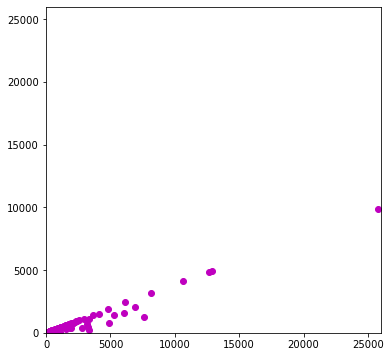

In [77]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(m.area1_c,m.area_g,'mo')
ax.set_xlim(0,26000)
ax.set_ylim(0,26000)

In [11]:
#%%
import numpy as np
import pandas as pd
import glob
import math
import datetime
import geopandas as gpd
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import shutil
# import cartopy.crs as ccrs # basemap is oud, cartopy nieuwer
folder = work_dir

#%% make dataframes for all catchments of metadata and timeseries -> DONE

for filepath in glob.iglob(f'{folder}/data/GSIM_data/GSIM_indices/TIMESERIES/yearly/US*'):
    print(filepath)
    # save catchment meta data in dataframe
    b = pd.read_csv(filepath,delimiter=':',skiprows=10,nrows=7, index_col=0)
    c = pd.DataFrame(index=[0],columns=['gsim.no','river','station','country','lat_deg','lon_deg','alt_m','area_km2'])
    c['gsim.no'] = str.strip(b.columns[0])
    c['river'] = str.strip(b.iloc[0,0])
    c['station'] = str.strip(b.iloc[1,0])
    c['country'] = str.strip(b.iloc[2,0])
    c['lat_deg'] = str.strip(b.iloc[3,0])
    c['lon_deg'] = str.strip(b.iloc[4,0])
    c['alt_m'] = str.strip(b.iloc[5,0])
    c['area_km2'] = str.strip(b.iloc[6,0])
    c = c.replace('',np.nan)
    c[['lat_deg','lon_deg','alt_m','area_km2']] = c[['lat_deg','lon_deg','alt_m','area_km2']].astype(float)
    
    
    # save catchment timeseries in dataframe
    a = pd.read_csv(filepath, skiprows=21, delimiter=',',index_col=0)
    a.index = pd.to_datetime(a.index)
    a.columns = a.columns.str.strip() # remove \t (=tab))    
    # drop columns we don't need
    a = a.drop(columns=['"GINI"','"CV"','"CT"','"P10"', '"P20"', '"P30"', '"P40"', '"P50"', '"P60"', '"P70"', '"P80"', '"P90"'])
    a = a.astype(str)
    
    # remove all tabs
    for i in range(len(a)): #loop over rows
        for j in range(len(a.iloc[0])): # loop over columns
            a.iloc[i,j] = a.iloc[i,j].strip()
            
    # replace NA with 999
    a = a.replace('NA',np.nan)
    
    #rename columns
    a = a.rename(columns={'"MEAN"': 'mean_m3s', '"SD"': 'sd_m3s', '"IQR"': 'iqr_m3s', '"MIN"': 'min_m3s', '"MAX"': 'max_m3s',
            '"MIN7"': 'min7_m3s', '"MAX7"': 'max7_m3s', '"DOYMIN"':'doymin','"DOYMAX"':'doymax', '"DOYMIN7"':'doy7min', '"DOYMAX7"':'doy7max',
            '"n.missing"':'nr_mis_days','"n.available"':'nr_av_days'})
    a = a.astype(float)
    
    #convert values to mm/day
    area_m2 = c.area_km2.values[0] * (10**6)
    a_mm = a
    a_mm = a_mm.rename(columns={'mean_m3s':'mean_mmd', 'sd_m3s':'sd_mmd', 'iqr_m3s':'iqr_mmd', 'min_m3s':'min_mmd', 'max_m3s':'max_mmd', 'min7_m3s':'min7_mmd','max7_m3s':'max7_mmd'})
    a_mm[['mean_mmd', 'sd_mmd', 'iqr_mmd', 'min_mmd', 'max_mmd', 'min7_mmd','max7_mmd']] = a[['mean_m3s', 'sd_m3s', 'iqr_m3s', 'min_m3s', 'max_m3s', 'min7_m3s','max7_m3s']] * (1/area_m2) * 1000 * 86400
    a_mm = a_mm.rename(columns={'mean_m3s':'mean_mmd', 'sd_m3s':'sd_mmd', 'iqr_m3s':'iqr_mmd', 'min_m3s':'min_mmd', 'max_m3s':'max_mmd', 'min7_m3s':'min7_mmd','max7_m3s':'max7_mmd'})
    a_mm = a_mm.astype(float)
    
    #catchid
    catch_id = c['gsim.no'].values[0]
    
    # add length timeseries to c
    c['start_year'] = a_mm.index[0]
    c['end_year'] = a_mm.index[-1]
    c['length_ts_yr'] = int((a_mm.index[0] - a_mm.index[-1]).days / -365)
    c['start_year'] = pd.to_datetime(c['start_year'])
    c['end_year'] = pd.to_datetime(c['end_year'])
    
    # save to 
    c.to_csv(str(folder)+'/data/GSIM_data/processed_us/catchment_metadata/'+str(catch_id)+'.csv')
    a.to_csv(str(folder)+'/data/GSIM_data/processed_us/catchment_yearly/m3_s/'+str(catch_id)+'.csv')
    a_mm.to_csv(str(folder)+'/data/GSIM_data/processed_us/catchment_yearly/mm_day/'+str(catch_id)+'.csv')

/mnt/u/LSM root zone/global_sr/data/GSIM_data/GSIM_indices/TIMESERIES/yearly/US_0006647.year
/mnt/u/LSM root zone/global_sr/data/GSIM_data/GSIM_indices/TIMESERIES/yearly/US_0006905.year
/mnt/u/LSM root zone/global_sr/data/GSIM_data/GSIM_indices/TIMESERIES/yearly/US_0000403.year
/mnt/u/LSM root zone/global_sr/data/GSIM_data/GSIM_indices/TIMESERIES/yearly/US_0002900.year
/mnt/u/LSM root zone/global_sr/data/GSIM_data/GSIM_indices/TIMESERIES/yearly/US_0000240.year
/mnt/u/LSM root zone/global_sr/data/GSIM_data/GSIM_indices/TIMESERIES/yearly/US_0003376.year
/mnt/u/LSM root zone/global_sr/data/GSIM_data/GSIM_indices/TIMESERIES/yearly/US_0000476.year
/mnt/u/LSM root zone/global_sr/data/GSIM_data/GSIM_indices/TIMESERIES/yearly/US_0001460.year
/mnt/u/LSM root zone/global_sr/data/GSIM_data/GSIM_indices/TIMESERIES/yearly/US_0007823.year
/mnt/u/LSM root zone/global_sr/data/GSIM_data/GSIM_indices/TIMESERIES/yearly/US_0000223.year
/mnt/u/LSM root zone/global_sr/data/GSIM_data/GSIM_indices/TIMESERIES/

KeyboardInterrupt: 

In [9]:
(f'{folder}/data/GSIM_indices/TIMESERIES/yearly/US*')

'/mnt/u/LSM root zone/global_sr/data/GSIM_indices/TIMESERIES/yearly/US*'

In [ ]:
#%%# select catchments
# - area quality high or medium
# - timeseries after 1980
# - amount of days <250 -> nan
# - remove nans
# - >10 years data

# make list with catchment ids that are ok:
catch_id = []
df = pd.read_csv(f'{folder}GSIM_metadata/GSIM_catalog/GSIM_catchment_characteristics.csv',index_col=0) 

for filepath in glob.iglob(f'{folder}GSIM_processed_data/catchment_metadata/*'):
    print(filepath)
    a = pd.read_csv(filepath,index_col=0)
    a['start_year'] = pd.to_datetime(a['start_year'])
    a['end_year'] = pd.to_datetime(a['end_year'])
    k = a['gsim.no'][0]   
    
    # if end year earlier than 1980 go to next iteration
    if a['end_year'][0]< datetime.datetime(year=1980,month=1,day=1):
        continue
        
    filepath2 = f'{folder}GSIM_processed_data/catchment_yearly/mm_day/'+str(k)+'.csv'
    b = pd.read_csv(filepath2,index_col=0)
    
    # later than 1980
    b = b.loc['1980-12-31':]
    
    # set to nan if nr available days <250
    b.mean_mmd[b['nr_av_days']<250] = np.nan
    
    # drop nan years
    b = b.dropna(axis=0)
    
    # check length of timeseries
    len_b = len(b)
    
    # >10 years data
    if len_b>10:
        # check area quality
        if (df.loc[k]['quality']=='High') or (df.loc[k]['quality']=='Medium'): # exclude areas with 'caution' and 'low' area quality
            catch_id.append(a['gsim.no'].values[0])
            b.to_csv(str(folder)+'GSIM_processed_data/catchment_yearly_selected/'+str(k)+'.csv')
s = np.asarray(catch_id)
s = s.astype(str)
np.savetxt(f'{folder}GSIM_processed_data/catch_id_selected_mmd.txt',s,fmt = '%s')